In [11]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import torch
import pickle

In [12]:
targets_1 = ['coco_memorize_0', 'coco_memorize_1', 'coco_memorize_2', 'coco_memorize_3', 'coco_memorize_4']
targets_2 = ['memorize_0', 'memorize_1', 'memorize_2', 'memorize_3', 'memorize_4']
root = '../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/%s/skilled_neurons/0.01'
T = 51
n_layers = 16

In [13]:
def calculate_iou_grid(masks, num_exps_start, num_exps_end, timesteps, n_layers):
    num_exps_ = num_exps_end - num_exps_start
    all_exps_iou = np.zeros((num_exps_end -  num_exps_start, num_exps_end -  num_exps_start, timesteps, n_layers))
    for exp1 in range(num_exps_start, num_exps_end):
        for exp2 in range(exp1 + 1, num_exps_end):
            for t in range(timesteps):
                for l in range(n_layers):
                    mask1 = masks[exp1][t][l]
                    mask2 = masks[exp2][t][l]
                    iou = intersection_over_union(mask1, mask2)
                    all_exps_iou[exp1%num_exps_, exp2%num_exps_, t, l] = iou
                    print(exp1, exp2, t, l, iou)
                    
    return all_exps_iou

def intersection_over_union(matrix1, matrix2) -> float:
    # Ensure the matrices have the same shape
    if matrix1.shape != matrix2.shape:
        raise ValueError("Matrices must have the same shape")
    
    # Calculate the intersection (logical AND)
    intersection = (matrix1.multiply(matrix2)).sum()
    
    # Calculate the union (logical OR)
    union = matrix1.sum() + matrix2.sum() - intersection
    
    # Handle case where union is zero to avoid division by zero
    if union == 0:
        return 0.0
    
    # Calculate the IoU
    iou = intersection / union
    
    return iou

In [15]:

def calc_pairwise_iou_avg_time(targets):
    pairwise_iou = np.zeros((len(targets), len(targets), n_layers))

    for c1 in range(len(targets)):
        skill_neurons_path = root % targets[c1]
        print(skill_neurons_path)
        for c2 in range(len(targets)):
            skill_neurons_path2 = root % targets[c2]
            print(skill_neurons_path2)
            
            if c1 == c2:
                continue
            for l in range(0, n_layers):
                avg_iou = 0
                for t in range(0, T):
                    # load with pkl file
                    with open(os.path.join(skill_neurons_path, f'timestep_{t}_layer_{l}.pkl'), 'rb') as f:
                        masks1 = pickle.load(f)
                    with open(os.path.join(skill_neurons_path2, f'timestep_{t}_layer_{l}.pkl'), 'rb') as f:
                        masks2 = pickle.load(f)
                    iou = intersection_over_union(masks1, masks2)
                    avg_iou += iou
                avg_iou /= T
                pairwise_iou[c1, c2, l] = avg_iou

    print(pairwise_iou)
    # average over the first dimension
    pairwise_iou = np.mean(pairwise_iou, axis=0)
    average_iou = np.mean(pairwise_iou, axis=0)
    print(average_iou.shape)
    return average_iou

# # plot the average iou
# plt.bar(range(T), average_iou)
# plt.xlabel('Timesteps')
# plt.ylabel('Average IoU')
# plt.title('Average IoU between neurons')
# plt.show()           
               

In [14]:
iou1 = calc_pairwise_iou_avg_time(targets_1)
iou2 = calc_pairwise_iou_avg_time(targets_2)



../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/coco_memorize_0/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/coco_memorize_0/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/coco_memorize_1/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/coco_memorize_2/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/coco_memorize_3/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/coco_memorize_4/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/coco_memorize_1/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/coco_memorize_0/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/coco_memorize_1/skilled_neurons/0.01
.

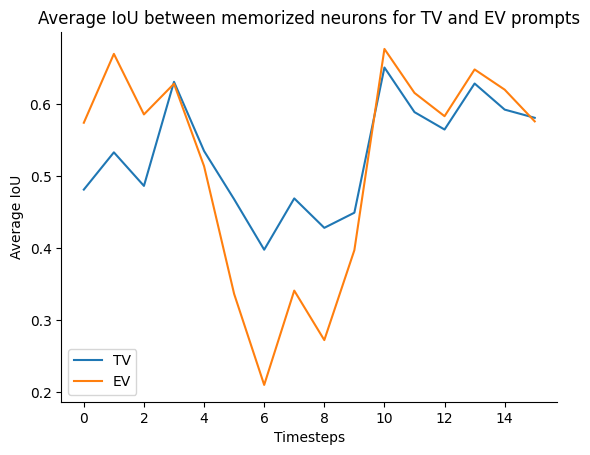

In [19]:

# plot the average iou of both in the same plot
plt.plot(range(n_layers), iou1, label='TV')
plt.plot(range(n_layers), iou2, label='EV')
plt.xlabel('Timesteps')
plt.ylabel('Average IoU')
plt.legend()
plt.title('Average IoU between memorized neurons for TV and EV prompts')
# remove top and right spines
sns.despine()
plt.savefig('average_iou_tv_mv.pdf')

In [19]:
targets1 = ['Van Gogh', 'memorize_0']
targets2 = ['Monet', 'memorize_0']
targets3 = ['Van Gogh', 'Monet']

In [20]:
iou1  = calc_pairwise_iou_avg_time(targets1)
iou2  = calc_pairwise_iou_avg_time(targets2)
iou3  = calc_pairwise_iou_avg_time(targets3)
print(iou1)
print(iou2)
print(iou3)

../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/Van Gogh/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/Van Gogh/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/memorize_0/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/memorize_0/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/Van Gogh/skilled_neurons/0.01
../results/results_seed_0/stable-diffusion/runwayml/stable-diffusion-v1-5/memorize_0/skilled_neurons/0.01
[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.0986134  0.09974675 0.10076896 0.15234797 0.09591794 0.09150599
   0.01809838 0.03626185 0.05735122 0.05353622 0.0249831  0.02991523
   0.04579967 0.09177201 0.0743266  0.11446952]]

 [[0.0986134

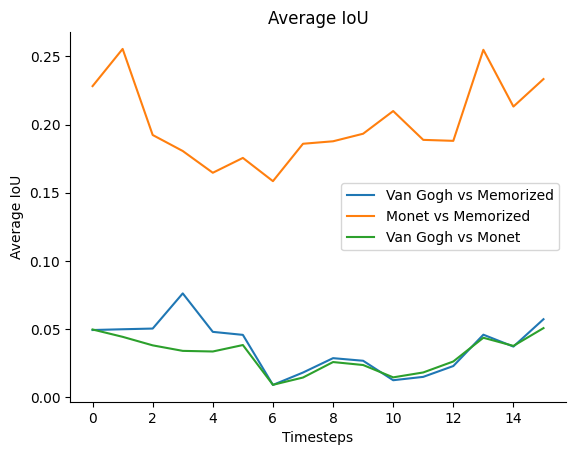

In [21]:
# plot iou for different prompts
plt.plot(range(n_layers), iou1, label='Van Gogh vs Memorized')
plt.plot(range(n_layers), iou3, label='Monet vs Memorized')
plt.plot(range(n_layers), iou2, label='Van Gogh vs Monet')
plt.xlabel('Timesteps')
plt.ylabel('Average IoU')
plt.legend()
plt.title('Average IoU between different concepts')
# remove top and right spines
sns.despine()
plt.savefig('average_iou_different_concepts.pdf')
plt.show()